In [8]:
%pylab notebook
from modules import constants as cnst
from modules import ana_moment_fit
from modules import ml_moment_fit as mlfit
import math
from scipy.interpolate import interp1d

Populating the interactive namespace from numpy and matplotlib


In [9]:
data=loadtxt("./data/sed.txt")
nu=data[:,0]
Inu=data[:,1]
err=data[:,2]

<IPython.core.display.Javascript object>


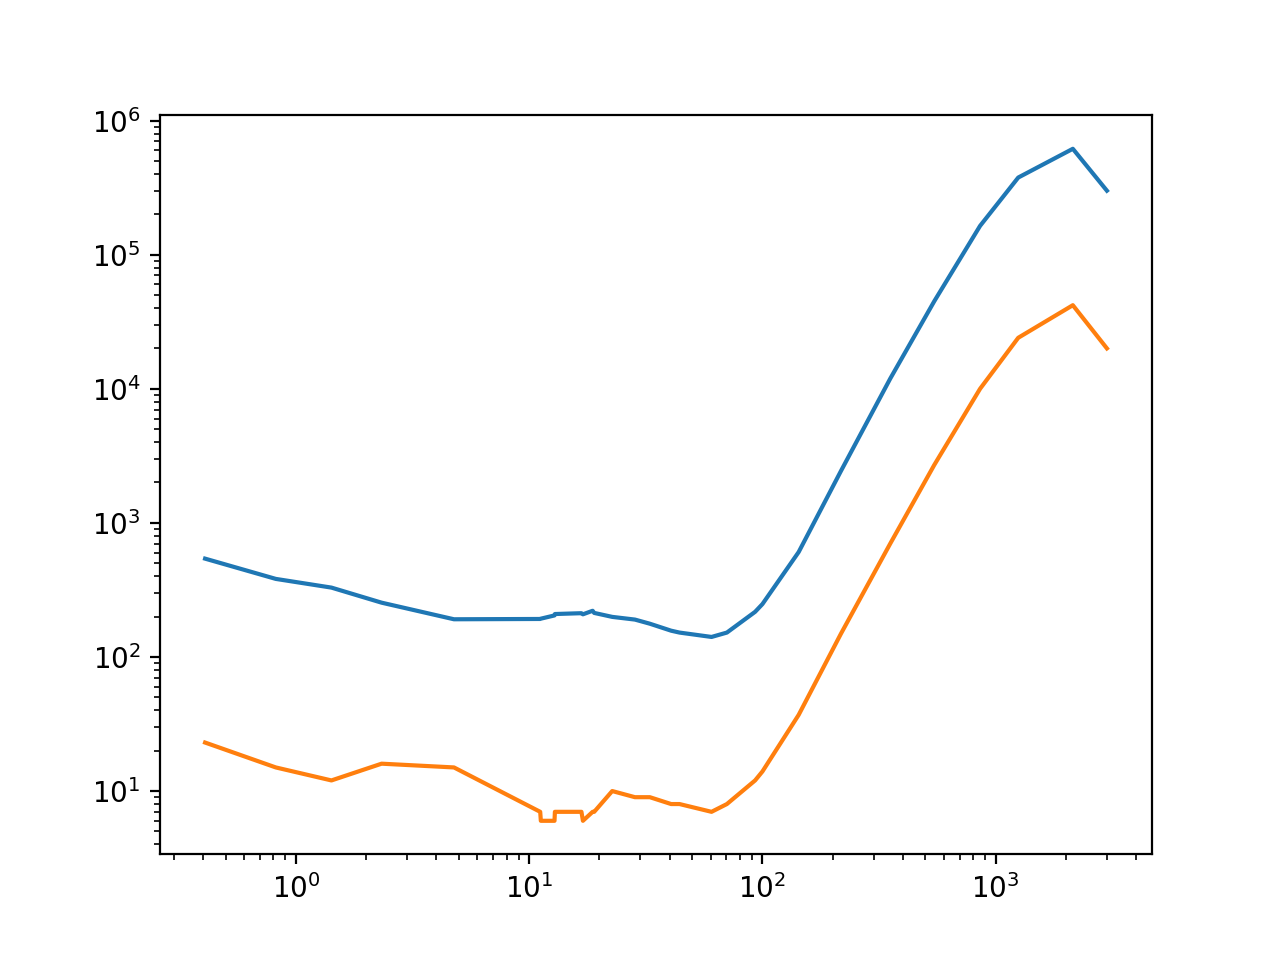

[]

In [10]:
figure()
plot(nu,Inu)
plot(nu,err)
loglog()

In [11]:
mf=ana_moment_fit.moment_fit(8)

In [48]:
par2=mf.fit_monopole_sed(nu,Inu,2,err=err,maxfev=500000) ; print par2
par3=mf.fit_monopole_sed(nu,Inu,3,err=err,maxfev=500000) ; print par3
par4=mf.fit_monopole_sed(nu,Inu,4,err=err,maxfev=500000) ; print par4
par5=mf.fit_monopole_sed(nu,Inu,5,err=err,maxfev=500000) ; print par5

[ -3.44465211e-05   1.02911621e+02  -1.37326208e+00  -3.62137287e-03
   3.66115938e-07  -9.66651147e-01]
[  7.45176036e-05   1.50710245e+02  -1.29864754e+00   1.52707691e+00
  -4.60829282e+00   4.89284465e-01   5.24477727e-06   1.50495233e+00
  -4.45814122e+00   9.44688789e-01]
[  3.58724792e-02   1.47001483e+01  -1.08691836e+00  -2.39301635e-01
  -7.94910961e-01  -1.05290537e+00  -8.37939997e-02  -1.25309178e-04
  -9.31781239e-02  -1.71062909e-01   4.43472648e-02  -2.45075332e-01
   5.45267249e-01   2.98781628e-01   3.02902037e-01]
[  3.65873235e-03   1.39868408e+01  -1.03302276e+00   2.99552606e-02
  -1.97236428e-01  -5.20823048e-01  -1.31734233e+00  -1.94720625e-01
   1.50788865e-05   6.54175472e-01   3.49459577e+00  -1.12008549e-01
   1.50629471e-01  -7.80879629e-02   1.16355352e-01  -2.01340474e-01
   3.74138526e+00   1.38431932e+00  -2.48812591e-01   2.41441176e-01
  -5.45755638e-01]


<IPython.core.display.Javascript object>


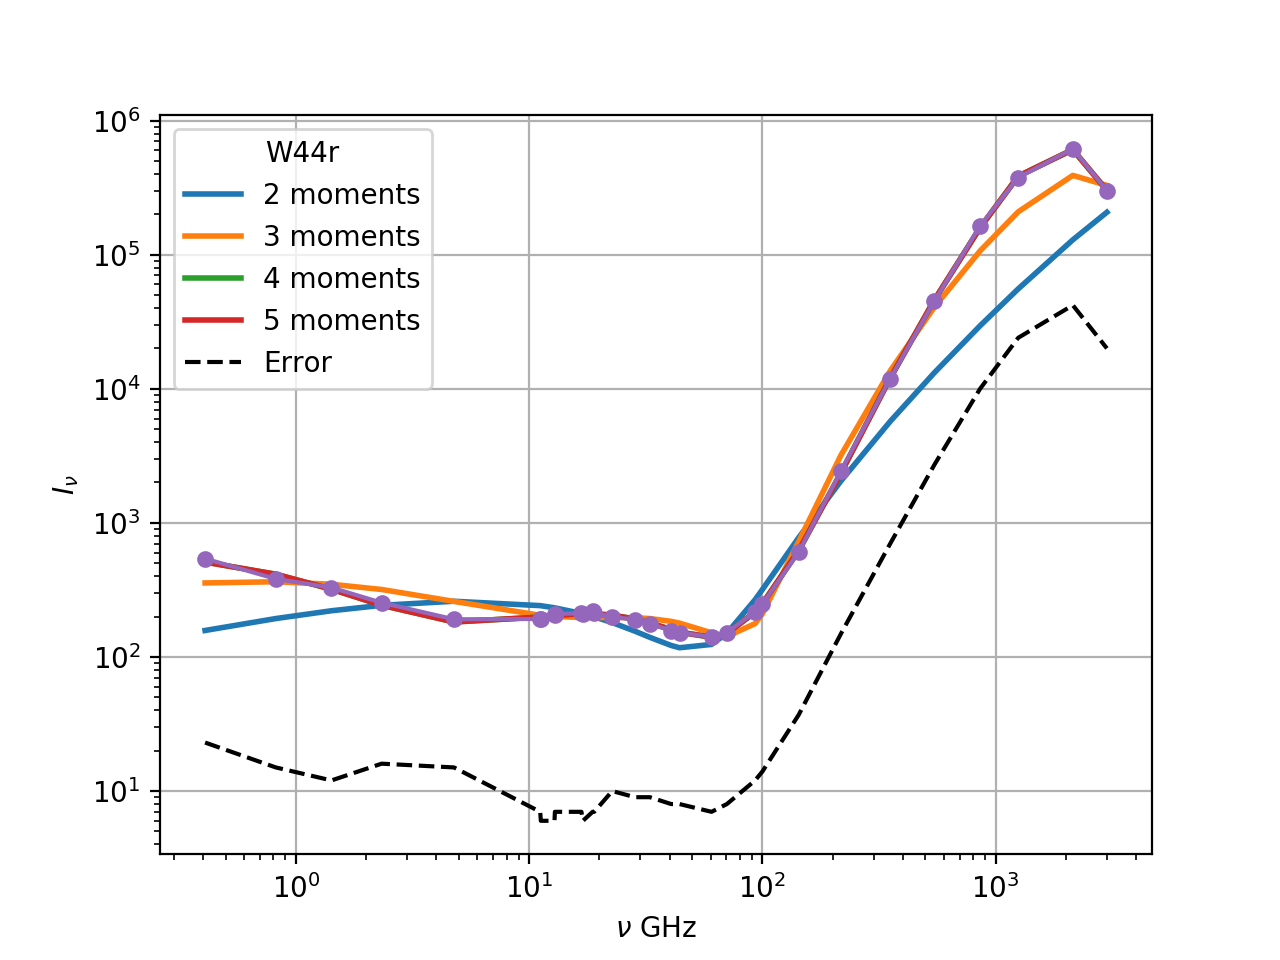

In [51]:
figure()
plot(nu,mf.moment_expansion_function(nu,*par2),lw=2,label="2 moments")
plot(nu,mf.moment_expansion_function(nu,*par3),lw=2,label="3 moments")
plot(nu,mf.moment_expansion_function(nu,*par4),lw=2,label="4 moments")
plot(nu,mf.moment_expansion_function(nu,*par5),lw=2,label="5 moments")
plot(nu,Inu,"o-",ms=5)
plot(nu,err,"k--",label="Error")


#plot(nu,err,"k--")
ylabel(r"$I_{\nu}$")
xlabel(r"$\nu$" + " GHz")
legend(loc=0,title="W44r")
loglog()
grid()

savefig("sed_fit.pdf")

<IPython.core.display.Javascript object>


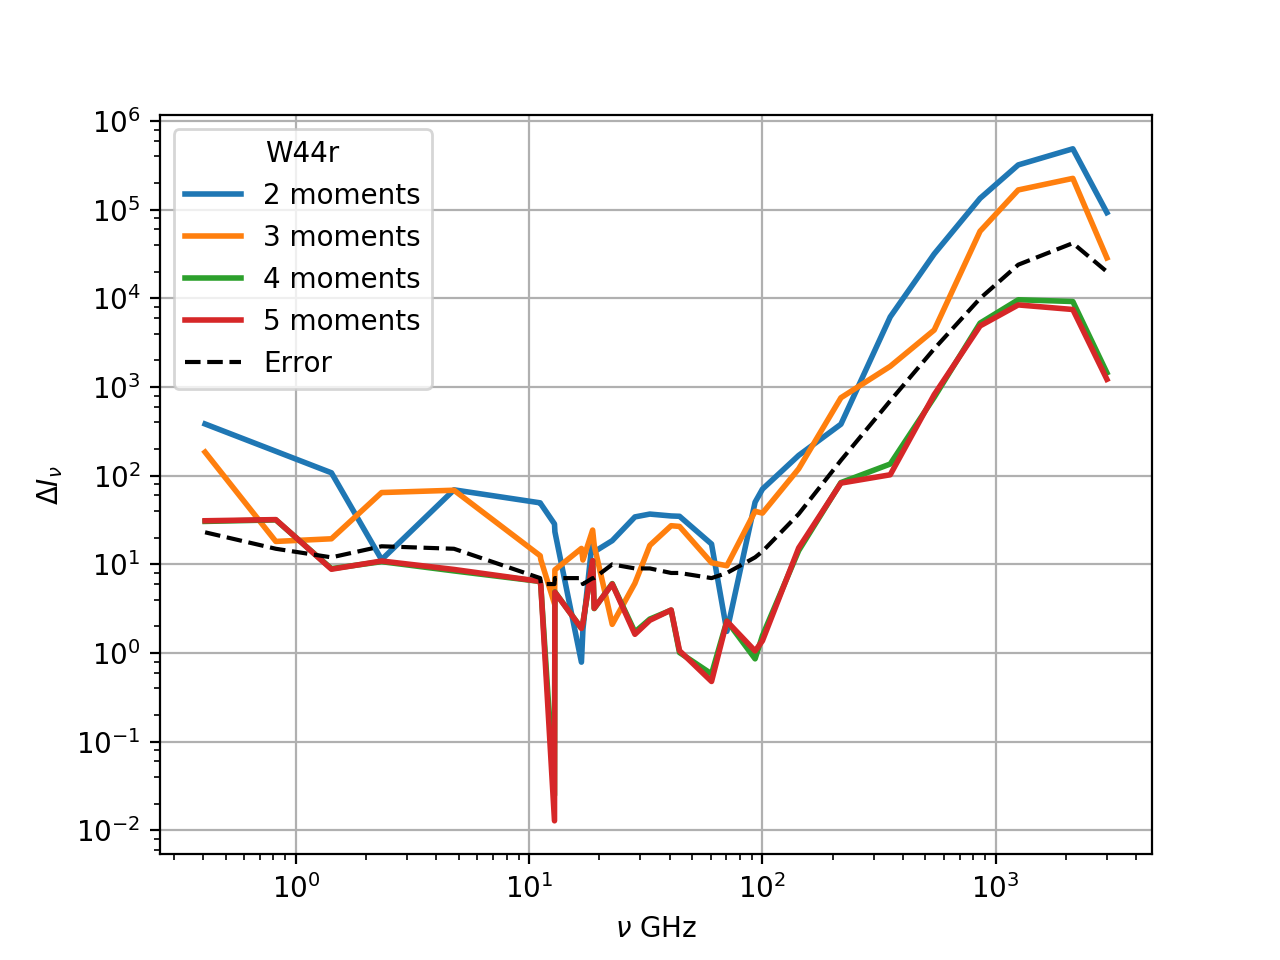

In [50]:
figure()
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par2)),lw=2,label="2 moments")
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par3)),lw=2,label="3 moments")
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par4)),lw=2,label="4 moments")
plot(nu,abs(Inu-mf.moment_expansion_function(nu,*par5)),lw=2,label="5 moments")
#plot(nu,Inu,"o-",ms=5)
plot(nu,err,"k--",label="Error")
ylabel(r"$\Delta I_{\nu}$")
xlabel(r"$\nu$" + " GHz")
legend(loc=0,title="W44r")
loglog()
grid()
savefig("sed_fit_err.pdf")